In [2]:
import matplotlib.pyplot as plt
import scipy.io.wavfile

from scipy.signal import butter, lfilter, freqz, filtfilt, firwin
import numpy as np
import time 
import os


from playsound import playsound

In [3]:
# Filtros de banda

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_bandpass_filter_see(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = freqz(b, a, worN=2000)
    return w, h
    
# Filtro passa-baixa
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='lowpass', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

    w, h = freqz(b, a, worN=2000)
    return w, h

def butter_lowpass_filter_see(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    w, h = freqz(b, a, worN=2000)
    return w, h
    
# Filtro passa-alta
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='highpass', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


def butter_highpass_filter_see(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    w, h = freqz(b, a, worN=2000)
    return w, h



**Tranformação de Fourier**

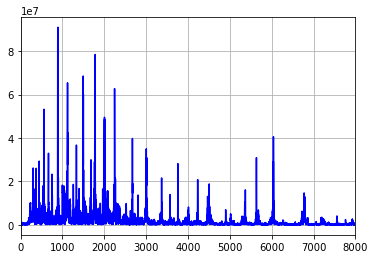

ModuleNotFoundError: No module named 'gi'

In [4]:
rate, data = scipy.io.wavfile.read('The_Last.wav')

data_bis = np.fft.fft(data)


d = len(data_bis)/2 

plt.grid()
plt.xlim(0, 8000)
plt.plot(abs(data_bis[:int(d-1)]),'b') 
plt.show()

playsound('The_Last.wav')

**Filtro Passa-Baixa**

<ipython-input-5-50a846901c68>:18: ComplexWarning: Casting complex values to real discards the imaginary part
  y = y.astype('int16')


ModuleNotFoundError: No module named 'gi'

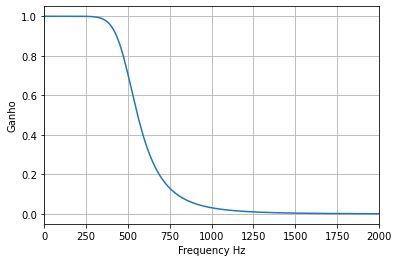

In [5]:
# Passa Baixa

lowcut = 500

c= data
c = butter_lowpass_filter(c, lowcut, rate, order=5)
w, h = butter_lowpass_filter_see(c, lowcut, rate, order=5)
y = np.fft.ifft(c)

d = len(y)/2  

plt.grid()
plt.xlabel("Frequency Hz")
plt.ylabel("Ganho")
plt.xlim(0, 2000)
plt.plot((rate * 0.5 / np.pi) * w, abs(h))

y = y.astype('int16')

sound = "low_" + str(int(time.time())) + ".wav"
scipy.io.wavfile.write(sound, rate, y)
playsound(sound)

**Filtro Passa-Alta**

In [ ]:
highcut = 2000

c = data
c = butter_highpass_filter(c, highcut, rate, order=2)
w, h = butter_highpass_filter_see(c, highcut, rate, order=5)

y = np.fft.ifft(c)

d = len(y)/2  

plt.grid()
plt.xlabel("Frequency Hz")
plt.ylabel("Ganho")
plt.xlim(0, 8000)
plt.plot((rate * 0.5 / np.pi) * w, abs(h))

y = y.astype('int16')

sound = "high_" + str(int(time.time())) + ".wav"
scipy.io.wavfile.write(sound, rate, y)
playsound(sound)

**Filtro Passa-Banda**

In [ ]:
# Passa banda

highcut = 2000
lowcut = 500

c = data_bis

c = butter_bandpass_filter(c, lowcut, highcut, rate, order=5)
w, h = butter_bandpass_filter_see(c, lowcut, highcut, rate, order=5)

y = np.fft.ifft(c)

d = len(y)/2  

plt.grid()
plt.xlim(0, 8000)
plt.xlabel("Frequency Hz")
plt.ylabel("Ganho")
plt.plot((rate * 0.5 / np.pi) * w, abs(h))


y = y.astype('int16')

sound = "band_" + str(int(time.time())) + ".wav"
scipy.io.wavfile.write(sound, rate, y)
playsound(sound)